<h2 align="center"><b>Кмоп'ютерний практикум №5</b></h2>
<h3 align="center">Дослідження особливостей алгоритму сортування злиттям</h3>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>

### **Мета роботи**

Реалізація та порівняльний аналіз модифікацій алгоритму сортування злиттям.

### **Завдання на комп'ютерний практикум**

1) Реалiзувати рекурсивний (Top-Down MergeSort) та iтеративний (Bottom-Up MergeSort) варiанти алгоритму сортування злиттям (з пiдтримкою обчислення часу виконання, кiлькостi проведених порiвнянь, операцiй“копiювань” та використаної пам’ятi).


2) Пiдготувати данi рiзного розмiру для проведення порiвняльного аналiзу. Мають бути набори повнiстю вiдсортованi данi, випадковi, майже вiдсортованi, вiдсортованi в зворотному порядку та лише з декiлькома рiзними значеннями всiх розмiрiв. Розмiр даних має бути з достатнього дiапазону, щоб побачити тенденцiю, й повинен мiстити такi, на яких можна побачити рiзницю. Можна взяти обмеження за часом виконання вiд 0.01с до 30с.


3) Реалiзувати додатково третiй варiант алгоритму сортування злиттям, який має бути iтеративним з оптимiзацiями cutoff(-to-insertion), stop-if-already-sorted та eliminate-the- copy-to-the-auxiliary-array.


4) Реалiзувати додатково четвертий варiант алгоритму сортування злиттям, який має бути iтеративним, але з подiлом на 10 частин, а не 2 частини. Замiсть такого варiанту можна реалiзувати алгоритм сортування злиттям для зв’язного списку, а не масиву.


5) Виконати порiвняльний аналiз (з даними рiзного розмiру) всiх чотирьох варiантiв алгоритму сортування злиттям вiдносно часу виконання, кiлькостi проведених порiвнянь, операцiй “копiювань” та використаної пам’ятi.

**Додаткові завдання (бонусні бали):**
> 1)  Необхiдно обчислити точнi значення мiнiмальної та максимальної кiлькостi порiвнянь для кожного можливого розмiру (треба перебрати всi можливi початковi перестановки). З кожним мiнiмальним та максимальним значенням необхiдно надати вiдповiдний кортеж початкових даних. Додатковi бали (2 бали) отримає той, хто побудує правильнi послiдовностi мiнiмальної та максимальної кiлькостi порiвнянь алгоритму злиття максимальної довжини. Додатковi бали можуть отримати декiлька студентiв, якщо результати будуть майже одного рiвня.
>
>
> 2) Використайте програму створення вхiдних даних gensort для алгоритмiв сортування конкурсу http://sortbenchmark.org/FAQ.html. Створiть файл iз 10 мiльйонами записiв (gensort -a 10000000 input.dat). Ознайомтесь уважно iз правилами сортування за посиланням конкурсу. Застосуйте власну реалiзацiю алгоритму сортування злиттям до створеного файлу (його також треба надати). Додатковi бали (2 бали) отримає той, чия реалiзацiя буде найшвидшою. Додатковi бали можуть отримати декiлька студентiв, якщо результати будуть майже одного рiвня.

In [1456]:
import matplotlib.pyplot as plt
import random
import copy
import time
import sys

print("Import complete")

Import complete


Окермий клас лічильник для підрахунку кількості порівнянь, копіювань та використання пам'яті

In [1457]:
class Metrics:
    def __init__(self):
        self.memory_usage = 0
        self.comparisons = 0
        self.copies = 0
    
    def reset(self):
        self.memory_usage = 0
        self.comparisons = 0
        self.copies = 0

metrics = Metrics()

Рекурсивний MergeSort

In [1458]:
def merge_sort_recursive(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    # якщо довжина непарна елемент, що не влазить йде у праву частину
    left_part, right_part = arr[:mid], arr[mid:]
    # + копіювання
    metrics.copies += len(arr)
    # + пам'ять
    metrics.memory_usage += left_part.__sizeof__() + right_part.__sizeof__()
    
    left = merge_sort_recursive(left_part)
    right = merge_sort_recursive(right_part)
    
    return merge_recursive(left, right)

# як говорив великий Фес тут вся складність
def merge_recursive(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        # + порівняння
        metrics.comparisons += 1
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
        # + копіювання
        metrics.copies += 1

    result.extend(left[i:])
    metrics.copies += len(left) - i
    result.extend(right[j:])
    metrics.copies += len(right) - j
    # + пам'ять
    metrics.memory_usage += result.__sizeof__()
    return result

Ітеративний MergeSort

In [1459]:
def merge_sort_iterative(arr):
    width = 1
    n = len(arr)
    
    while width < n:
        left = 0
        while left < n:
            right = min(left + (width * 2 - 1), n - 1)
            mid = min(left + width - 1, n - 1)
            merge_iterative(arr, left, mid, right)
            left += width*2
        
        width *= 2
    return arr

def merge_iterative(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid
    
    L = arr[left : left + n1]
    R = arr[mid + 1 : mid + 1 + n2]
    # + копіювання
    metrics.copies += n1 + n2
    # + пам'ять
    metrics.memory_usage += L.__sizeof__()
    metrics.memory_usage += R.__sizeof__()
    
    i, j, k = 0, 0, left
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
        # + порівняння
        metrics.comparisons += 1
        # + копіювання
        metrics.copies += 1
    
    while i < n1:
        arr[k] = L[i]
        # + копіювання
        metrics.copies += 1
        i += 1
        k += 1
    
    while j < n2:
        arr[k] = R[j]
        # + копіювання
        metrics.copies += 1
        j += 1
        k += 1

Поглянемо на результат роботи обох алгоритмів на випадковому масиву довжини 10

In [1460]:
test_data = [random.randint(1, 100) for _ in range(11)]

In [1461]:
metrics.reset()

start_time_recursive = time.time()
sorted_data = merge_sort_recursive(test_data)
end_time_recursive = time.time()

{
    # "original_data": test_data,
    # "sorted_data": sorted_data,
    "time_elapsed": end_time_recursive - start_time_recursive,
    "comparisons": metrics.comparisons,
    "copies": metrics.copies,
    "memory_usage_bytes": metrics.memory_usage,
}

{'time_elapsed': 0.0,
 'comparisons': 25,
 'copies': 78,
 'memory_usage_bytes': 1992}

In [1462]:
metrics.reset()

start_time_iterative = time.time()
sorted_data_iterative = merge_sort_iterative(copy.deepcopy(test_data))
end_time_iterative = time.time()

{
    # "original_data": test_data,
    # "sorted_data": sorted_data_iterative,
    "time_elapsed": end_time_iterative - start_time_iterative,
    "comparisons": metrics.comparisons,
    "copies": metrics.copies,
    "memory_usage_bytes": metrics.memory_usage,
}


{'time_elapsed': 0.0,
 'comparisons': 30,
 'copies': 88,
 'memory_usage_bytes': 1312}

### **Перейдемо до чорної магії**

генерації відсортованих масивів заданої множини, майже відсортований, випадкові, зворотньо відсортовані, декілька значень


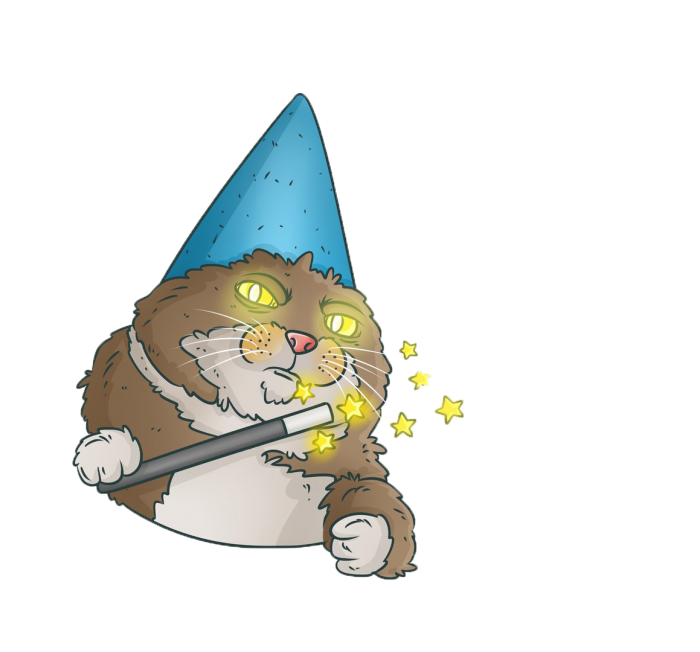

In [1463]:
# відсортовані масиви
def get_sorted_arr(n: int) -> list:
    return list(range(n))

In [1464]:
get_sorted_arr(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1465]:
# майже відсортовані
def get_nearly_sorted_arr(n: int) -> list:
    result = get_sorted_arr(n)
    for i in range(1, n):
        if random.random() > 0.8:
            # робимо свап
            result[i-1], result[i] = result[i], result[i-1]
    return result

In [1466]:
get_nearly_sorted_arr(10)

[0, 1, 2, 3, 5, 4, 7, 8, 6, 9]

In [1467]:
# випадкові
def get_random_arr(n: int) -> list:
    result = []
    for _ in range(n):
        result.append(random.randint(0, n))
    return result

In [1468]:
get_random_arr(10)

[1, 9, 1, 0, 8, 4, 10, 3, 7, 8]

In [1469]:
# зворотньо відсортовані
def get_reversed_sorted_arr(n: int) -> list:
    return list(range(n-1, -1, -1))

In [1470]:
get_reversed_sorted_arr(10)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [1471]:
# випадкові
def get_few_unique_arr(n: int) -> list:
    result = []
    for _ in range(n):
        result.append(random.randint(0, n//2))
    return result

In [1472]:
get_few_unique_arr(10)

[4, 5, 1, 4, 0, 0, 3, 0, 3, 2]

### **Оптимізація ітеративного MergeSort**

 - *cutoff(-to-insertion)* - використовує iнший алгоритм сортування
(включенням) для кортежiв невеликої довжини (≈ 10) (tiled
mergesort)
 - *stop-if-already-sorted* - допомагає для частково вiдсортованих
кортежiв при злиттi. Якщо найбiльший елемент одного кортежу
є меншим за найменший елемент iншого, то злиття стає
тривiальним.
 - *eliminate-the-copy-to-the-auxiliary-array* - дозволяє зменшити
час виконання за допомогою використання двох iнiцiалiзованих
кортежiв.

In [1473]:
def insertionSort(arr):
    n = len(arr)
    
    if n <= 1:
        return
    
    for i in range(1, n):
        key = arr[i]
        # + копіювання
        metrics.copies += 1
        # + порівняння
        metrics.memory_usage += key.__sizeof__()
        j = i-1
        while j >= 0 and key < arr[j]:
            # + порівняння
            metrics.comparisons += 1
            arr[j+1] = arr[j]
            # + копіювання
            metrics.copies += 1
            j -= 1
        # + порівняння
        metrics.comparisons += 1
        arr[j+1] = key 

In [1474]:
def merge_sort_iterative_optimized(arr):
    width = 4
    n = len(arr)
    
    while width < n:
        left = 0
        while left < n:
            right = min(left + (width * 2 - 1), n - 1)
            mid = min(left + width - 1, n - 1)
            merge_iterative_optimized(arr, left, mid, right)

            left += width*2
            
        
        width *= 2
    return arr

def merge_iterative_optimized(arr, left, mid, right):
    aux = arr[left : right + 1]
    # + пам'ять
    metrics.memory_usage += aux.__sizeof__()
    # + копіювання
    metrics.copies += right - left + 1
    
    n1 = mid - left + 1
    n2 = right - mid
    
    if right - left + 1 <= 8:
        
        insertionSort(aux)
        # + копіювання
        metrics.copies += right - left + 1
        
        arr[left : right + 1] = aux
        # + копіювання
        metrics.copies += right - left + 1
    else:
        # L = arr[left : left + n1]
        # R = arr[mid + 1 : mid + 1 + n2]
        if mid + 1 >= len(arr) or arr[mid] <= arr[mid+1]:
            # + порівняння
            metrics.comparisons += 1
            return
        else:
            i, j, k = 0, 0, left
            while i < n1 and j < n2:
                aux[i]
                if aux[i] <= aux[n1 + j]:
                    arr[k] = aux[i]
                    i += 1
                else:
                    arr[k] = aux[n1 + j]
                    j += 1
                k += 1
                # + порівняння
                metrics.comparisons += 1
                # + копіювання
                metrics.copies += 1
            
            while i < n1:
                arr[k] = aux[i]
                # + копіювання
                metrics.copies += 1
                i += 1
                k += 1
            
            while j < n2:
                arr[k] = aux[n1 + j]
                # + копіювання
                metrics.copies += 1
                j += 1
                k += 1

In [1475]:
metrics.reset()

start_time_iterative_optimized = time.time()
sorted_data_iterative_optimized = merge_sort_iterative_optimized(copy.deepcopy(test_data))
end_time_iterative_optimized = time.time()

{
    "original_data": test_data,
    "sorted_data": sorted_data_iterative_optimized,
    "time_elapsed": end_time_iterative_optimized - start_time_iterative_optimized,
    "comparisons": metrics.comparisons,
    "copies": metrics.copies,
    "memory_usage_bytes": metrics.memory_usage,
}


{'original_data': [45, 15, 80, 7, 57, 4, 40, 90, 1, 67, 94],
 'sorted_data': [1, 4, 7, 15, 40, 45, 57, 67, 80, 90, 94],
 'time_elapsed': 0.0,
 'comparisons': 32,
 'copies': 77,
 'memory_usage_bytes': 548}

### **Розбиття на 10 частин**

Реалiзувати додатково четвертий варiант алгоритму сортування злиттям, який має бути iтеративним, але з подiлом на 10 частин, а не 2 частини.


In [1489]:
def merge_sort_iterative_10(arr):
    width = 1
    n = len(arr)
    
    while width < n:
        index = []
        left = 0
        while left < n:
            for _ in range(11):
                index.append( min(left, n) )
                left += width
            merge_iterative_10(arr, index)
            left += width*10
        
        width *= 10
    return arr

def merge_iterative_10(arr, index: list):
    aux = arr[index[0]: index[-1]+1]
    
    # + пам'ять
    metrics.memory_usage += aux.__sizeof__()
    # + копіювання
    metrics.copies += len(aux)
    
    i_  = [0 for _ in range(10)]
    for k in range(index[0], index[-1]):
        # print(f"index:{index}")
        for i in range(10):
            if i_[i] < index[i+1] - index[i]:
                mii = i
        for i in range(10):
            metrics.comparisons += 1
            if i_[i] < index[i+1] - index[i]:
                if aux[index[mii] - index[0] + i_[mii]] > aux[index[i] - index[0] + i_[i]]:
                    mii = i
        # print(f"k:{k}, aux:{aux[index[mii] - index[0] + i_[mii]]}\nauxF:{aux},\n i_:{i_}")
                   
        arr[k] = aux[index[mii] - index[0] + i_[mii]]
        # + копіювання
        metrics.copies += 1
        i_[mii] += 1
        
                

In [1477]:
metrics.reset()

start_time_iterative_10 = time.time()
sorted_data_iterative_10 = merge_sort_iterative_10(copy.deepcopy(test_data))
end_time_iterative_10 = time.time()

{
    "original_data": test_data,
    "sorted_data": sorted_data_iterative_10,
    "time_elapsed": end_time_iterative_10 - start_time_iterative_10,
    "comparisons": metrics.comparisons,
    "copies": metrics.copies,
    "memory_usage_bytes": metrics.memory_usage,
}


{'original_data': [45, 15, 80, 7, 57, 4, 40, 90, 1, 67, 94],
 'sorted_data': [1, 4, 7, 15, 40, 45, 57, 67, 80, 90, 94],
 'time_elapsed': 0.0,
 'comparisons': 210,
 'copies': 43,
 'memory_usage_bytes': 256}

### **Графіки**
порiвняльний аналiз (з даними рiзного розмiру) всiх чотирьох варiантiв алгоритму сортування злиттям вiдносно часу виконання, кiлькостi проведених порiвнянь, операцiй“копiювань” та використаної пам’ятi.

In [1478]:
X_size = list(range(100, 1001, 100))
X_size

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [1479]:
pre_sorted_100          = []
pre_nearly_sorted_100   = []
pre_random_100          = []
pre_reversed_sorted_100 = []
pre_few_unique_100      = []

for x in X_size:
    _sorted_100          = []
    _nearly_sorted_100   = []
    _random_100          = []
    _reversed_sorted_100 = []
    _few_unique_100      = []
    
    for i in range(100):
        _sorted_100.append(get_sorted_arr(x))
        _nearly_sorted_100.append(get_nearly_sorted_arr(x))
        _random_100.append(get_random_arr(x))
        _reversed_sorted_100.append(get_reversed_sorted_arr(x))
        _few_unique_100.append(get_few_unique_arr(x))
    
    pre_sorted_100.append(_sorted_100)
    pre_nearly_sorted_100.append(_nearly_sorted_100)
    pre_random_100.append(_random_100)
    pre_reversed_sorted_100.append(_reversed_sorted_100)
    pre_few_unique_100.append(_few_unique_100)

Rec

In [1480]:
Y_time_rec_sorted_100          = []
Y_copies_rec_sorted_100        = []
Y_comparisons_rec_sorted_100   = []
Y_memory_rec_sorted_100        = []

#
for arrs in pre_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_rec_sorted_100.append((end_time - start_time)/100)
    Y_copies_rec_sorted_100.append(copies/100)
    Y_comparisons_rec_sorted_100.append(comparisons/100)
    Y_memory_rec_sorted_100.append(memory/100)
    

Y_time_rec_nearly_sorted_100        = []
Y_copies_rec_nearly_sorted_100      = []
Y_comparisons_rec_nearly_sorted_100 = []
Y_memory_rec_nearly_sorted_100      = []

#
for arrs in pre_nearly_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_rec_nearly_sorted_100.append((end_time - start_time)/100)
    Y_copies_rec_nearly_sorted_100.append(copies/100)
    Y_comparisons_rec_nearly_sorted_100.append(comparisons/100)
    Y_memory_rec_nearly_sorted_100.append(memory/100)
    

Y_time_rec_random_100        = []
Y_copies_rec_random_100      = []
Y_comparisons_rec_random_100 = []
Y_memory_rec_random_100      = []

#
for arrs in pre_random_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_rec_random_100.append((end_time - start_time)/100)
    Y_copies_rec_random_100.append(copies/100)
    Y_comparisons_rec_random_100.append(comparisons/100)
    Y_memory_rec_random_100.append(memory/100)
    

Y_time_rec_reversed_sorted_100          = []
Y_copies_rec_reversed_sorted_100        = []
Y_comparisons_rec_reversed_sorted_100   = []
Y_memory_rec_reversed_sorted_100        = []

#
for arrs in pre_reversed_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_rec_reversed_sorted_100.append((end_time - start_time)/100)
    Y_copies_rec_reversed_sorted_100.append(copies/100)
    Y_comparisons_rec_reversed_sorted_100.append(comparisons/100)
    Y_memory_rec_reversed_sorted_100.append(memory/100)
    

Y_time_rec_few_unique_100           = []
Y_copies_rec_few_unique_100         = []
Y_comparisons_rec_few_unique_100    = []
Y_memory_rec_few_unique_100         = []

#
for arrs in pre_few_unique_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_rec_few_unique_100.append((end_time - start_time)/100)
    Y_copies_rec_few_unique_100.append(copies/100)
    Y_comparisons_rec_few_unique_100.append(comparisons/100)
    Y_memory_rec_few_unique_100.append(memory/100)


Iter

In [1481]:
Y_time_iter_sorted_100          = []
Y_copies_iter_sorted_100        = []
Y_comparisons_iter_sorted_100   = []
Y_memory_iter_sorted_100        = []

#
for arrs in pre_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter_sorted_100.append(copies/100)
    Y_comparisons_iter_sorted_100.append(comparisons/100)
    Y_memory_iter_sorted_100.append(memory/100)
    

Y_time_iter_nearly_sorted_100           = []
Y_copies_iter_nearly_sorted_100         = []
Y_comparisons_iter_nearly_sorted_100    = []
Y_memory_iter_nearly_sorted_100         = []

#
for arrs in pre_nearly_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter_nearly_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter_nearly_sorted_100.append(copies/100)
    Y_comparisons_iter_nearly_sorted_100.append(comparisons/100)
    Y_memory_iter_nearly_sorted_100.append(memory/100)
    

Y_time_iter_random_100          = []
Y_copies_iter_random_100        = []
Y_comparisons_iter_random_100   = []
Y_memory_iter_random_100        = []

#
for arrs in pre_random_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter_random_100.append((end_time - start_time)/100)
    Y_copies_iter_random_100.append(copies/100)
    Y_comparisons_iter_random_100.append(comparisons/100)
    Y_memory_iter_random_100.append(memory/100)

Y_time_iter_reversed_sorted_100         = []
Y_copies_iter_reversed_sorted_100       = []
Y_comparisons_iter_reversed_sorted_100  = []
Y_memory_iter_reversed_sorted_100       = []

#
for arrs in pre_reversed_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter_reversed_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter_reversed_sorted_100.append(copies/100)
    Y_comparisons_iter_reversed_sorted_100.append(comparisons/100)
    Y_memory_iter_reversed_sorted_100.append(memory/100)


Y_time_iter_few_unique_100          = []
Y_copies_iter_few_unique_100        = []
Y_comparisons_iter_few_unique_100   = []
Y_memory_iter_few_unique_100        = []

#
for arrs in pre_few_unique_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter_few_unique_100.append((end_time - start_time)/100)
    Y_copies_iter_few_unique_100.append(copies/100)
    Y_comparisons_iter_few_unique_100.append(comparisons/100)
    Y_memory_iter_few_unique_100.append(memory/100)


Opt

In [1482]:
Y_time_opt_sorted_100           = []
Y_copies_opt_sorted_100         = []
Y_comparisons_opt_sorted_100    = []
Y_memory_opt_sorted_100         = []

#
for arrs in pre_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_opt_sorted_100.append((end_time - start_time)/100)
    Y_copies_opt_sorted_100.append(copies/100)
    Y_comparisons_opt_sorted_100.append(comparisons/100)
    Y_memory_opt_sorted_100.append(memory/100)
    

Y_time_opt_nearly_sorted_100        = []
Y_copies_opt_nearly_sorted_100      = []
Y_comparisons_opt_nearly_sorted_100 = []
Y_memory_opt_nearly_sorted_100      = []

#
for arrs in pre_nearly_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_opt_nearly_sorted_100.append((end_time - start_time)/100)
    Y_copies_opt_nearly_sorted_100.append(copies/100)
    Y_comparisons_opt_nearly_sorted_100.append(comparisons/100)
    Y_memory_opt_nearly_sorted_100.append(memory/100)
    

Y_time_opt_random_100           = []
Y_copies_opt_random_100         = []
Y_comparisons_opt_random_100    = []
Y_memory_opt_random_100         = []

#
for arrs in pre_random_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_opt_random_100.append((end_time - start_time)/100)
    Y_copies_opt_random_100.append(copies/100)
    Y_comparisons_opt_random_100.append(comparisons/100)
    Y_memory_opt_random_100.append(memory/100)
    

Y_time_opt_reversed_sorted_100          = []
Y_copies_opt_reversed_sorted_100        = []
Y_comparisons_opt_reversed_sorted_100   = []
Y_memory_opt_reversed_sorted_100        = []

#
for arrs in pre_reversed_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_recursive(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_opt_reversed_sorted_100.append((end_time - start_time)/100)
    Y_copies_opt_reversed_sorted_100.append(copies/100)
    Y_comparisons_opt_reversed_sorted_100.append(comparisons/100)
    Y_memory_opt_reversed_sorted_100.append(memory/100)
    

Y_time_opt_few_unique_100           = []
Y_copies_opt_few_unique_100         = []
Y_comparisons_opt_few_unique_100    = []
Y_memory_opt_few_unique_100         = []

#
for arrs in pre_few_unique_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_optimized(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_opt_few_unique_100.append((end_time - start_time)/100)
    Y_copies_opt_few_unique_100.append(copies/100)
    Y_comparisons_opt_few_unique_100.append(comparisons/100)
    Y_memory_opt_few_unique_100.append(memory/100)


Iter 10

In [1483]:
Y_time_iter10_sorted_100        = []
Y_copies_iter10_sorted_100      = []
Y_comparisons_iter10_sorted_100 = []
Y_memory_iter10_sorted_100      = []

#
for arrs in pre_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_10(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter10_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter10_sorted_100.append(copies/100)
    Y_comparisons_iter10_sorted_100.append(comparisons/100)
    Y_memory_iter10_sorted_100.append(memory/100)
    

Y_time_iter10_nearly_sorted_100         = []
Y_copies_iter10_nearly_sorted_100       = []
Y_comparisons_iter10_nearly_sorted_100  = []
Y_memory_iter10_nearly_sorted_100       = []

#
for arrs in pre_nearly_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_10(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter10_nearly_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter10_nearly_sorted_100.append(copies/100)
    Y_comparisons_iter10_nearly_sorted_100.append(comparisons/100)
    Y_memory_iter10_nearly_sorted_100.append(memory/100)
    

Y_time_iter10_random_100        = []
Y_copies_iter10_random_100      = []
Y_comparisons_iter10_random_100 = []
Y_memory_iter10_random_100      = []

#
for arrs in pre_random_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_10(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter10_random_100.append((end_time - start_time)/100)
    Y_copies_iter10_random_100.append(copies/100)
    Y_comparisons_iter10_random_100.append(comparisons/100)
    Y_memory_iter10_random_100.append(memory/100)
    

Y_time_iter10_reversed_sorted_100           = []
Y_copies_iter10_reversed_sorted_100         = []
Y_comparisons_iter10_reversed_sorted_100    = []
Y_memory_iter10_reversed_sorted_100         = []

#
for arrs in pre_reversed_sorted_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_10(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter10_reversed_sorted_100.append((end_time - start_time)/100)
    Y_copies_iter10_reversed_sorted_100.append(copies/100)
    Y_comparisons_iter10_reversed_sorted_100.append(comparisons/100)
    Y_memory_iter10_reversed_sorted_100.append(memory/100)
    

Y_time_iter10_few_unique_100        = []
Y_copies_iter10_few_unique_100      = []
Y_comparisons_iter10_few_unique_100 = []
Y_memory_iter10_few_unique_100      = []

#
for arrs in pre_few_unique_100:
    copies = 0
    comparisons = 0
    memory = 0
    start_time = time.time()
    for arr in arrs:
        metrics.reset()
        merge_sort_iterative_10(arr)
        copies += metrics.copies
        comparisons += metrics.comparisons
        memory += metrics.memory_usage
    end_time = time.time()
    #
    Y_time_iter10_few_unique_100.append((end_time - start_time)/100)
    Y_copies_iter10_few_unique_100.append(copies/100)
    Y_comparisons_iter10_few_unique_100.append(comparisons/100)
    Y_memory_iter10_few_unique_100.append(memory/100)

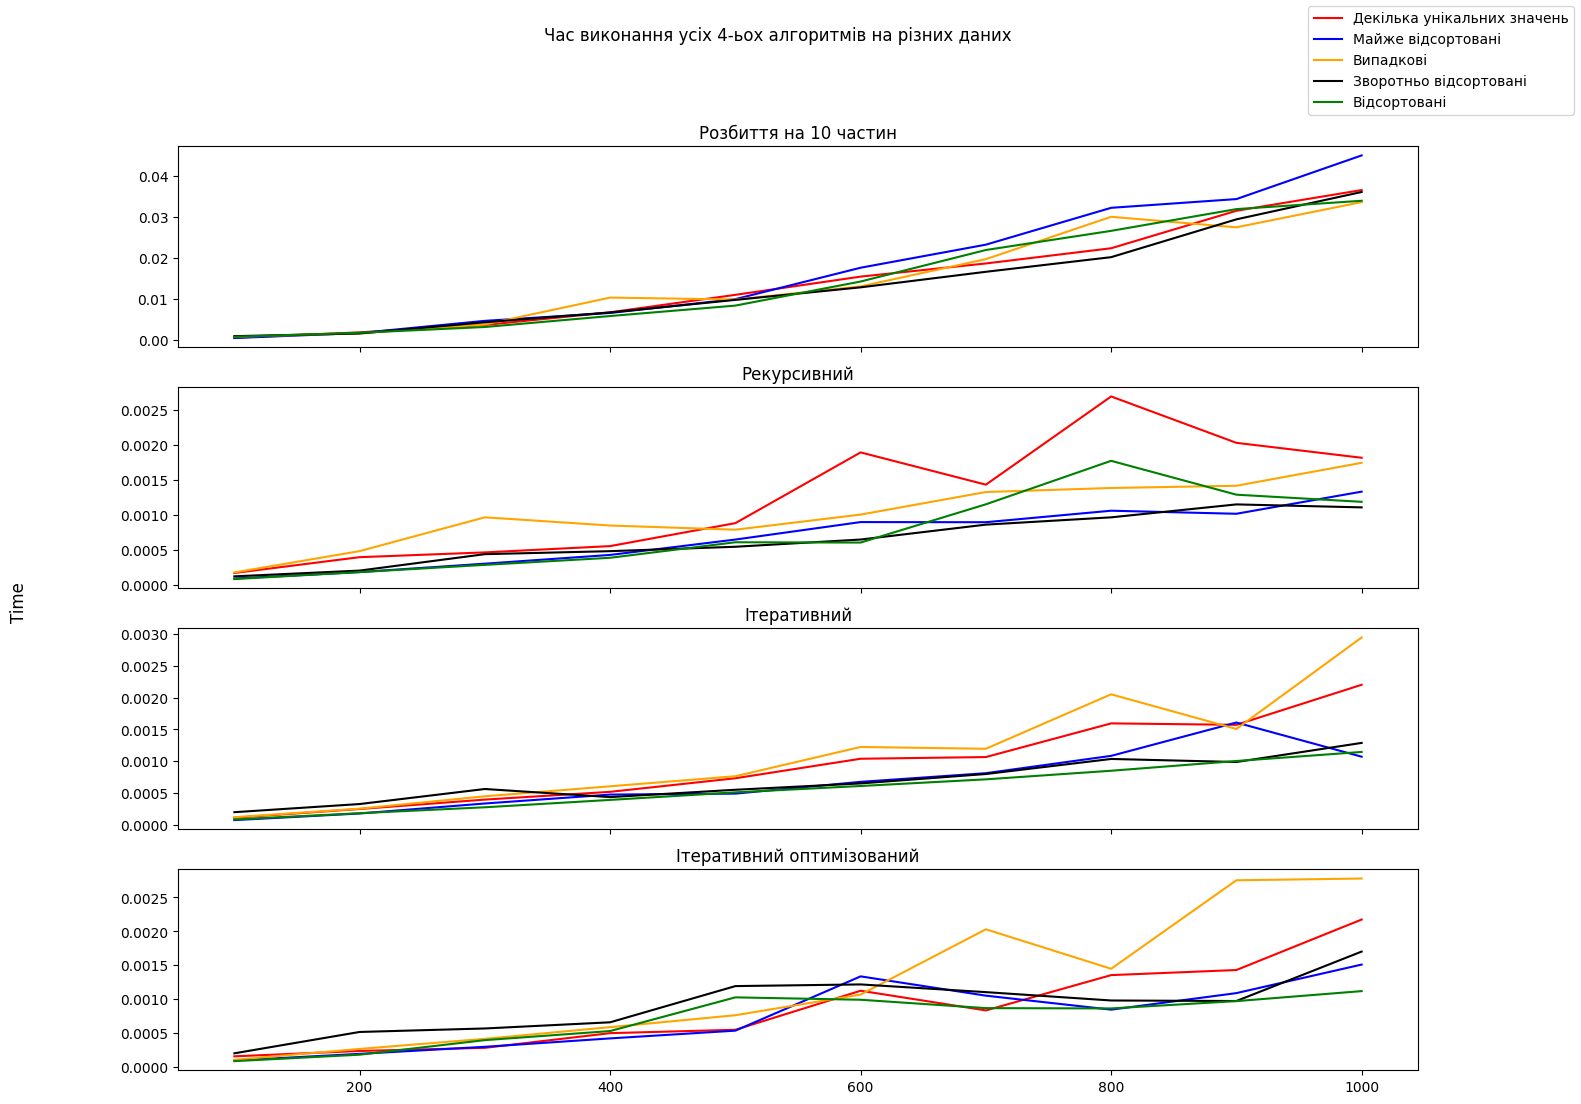

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
fig.supylabel('Time')
fig.suptitle('Час виконання усіх 4-ьох алгоритмів на різних даних')

axs[0].set_title("Розбиття на 10 частин")
axs[0].plot(X_size, Y_time_iter10_few_unique_100, color = "red", label = "Декілька унікальних значень")
axs[0].plot(X_size, Y_time_iter10_nearly_sorted_100, color = "blue", label = "Майже відсортовані")
axs[0].plot(X_size, Y_time_iter10_random_100, color = "orange", label = "Випадкові")
axs[0].plot(X_size, Y_time_iter10_reversed_sorted_100, color = "black", label = "Зворотньо відсортовані")
axs[0].plot(X_size, Y_time_iter10_sorted_100, color = "green", label = "Відсортовані")

axs[1].set_title("Рекурсивний")
axs[1].plot(X_size, Y_time_rec_few_unique_100, color = "red")
axs[1].plot(X_size, Y_time_rec_nearly_sorted_100, color = "blue")
axs[1].plot(X_size, Y_time_rec_random_100, color = "orange")
axs[1].plot(X_size, Y_time_rec_reversed_sorted_100, color = "black")
axs[1].plot(X_size, Y_time_rec_sorted_100, color = "green")

axs[2].set_title("Ітеративний")
axs[2].plot(X_size, Y_time_iter_few_unique_100, color = "red")
axs[2].plot(X_size, Y_time_iter_nearly_sorted_100, color = "blue")
axs[2].plot(X_size, Y_time_iter_random_100, color = "orange")
axs[2].plot(X_size, Y_time_iter_reversed_sorted_100, color = "black")
axs[2].plot(X_size, Y_time_iter_sorted_100, color = "green")

axs[3].set_title("Ітеративний оптимізований")
axs[3].plot(X_size, Y_time_opt_few_unique_100, color = "red")
axs[3].plot(X_size, Y_time_opt_nearly_sorted_100, color = "blue")
axs[3].plot(X_size, Y_time_opt_random_100, color = "orange")
axs[3].plot(X_size, Y_time_opt_reversed_sorted_100, color = "black")
axs[3].plot(X_size, Y_time_opt_sorted_100, color = "green")
fig.legend()


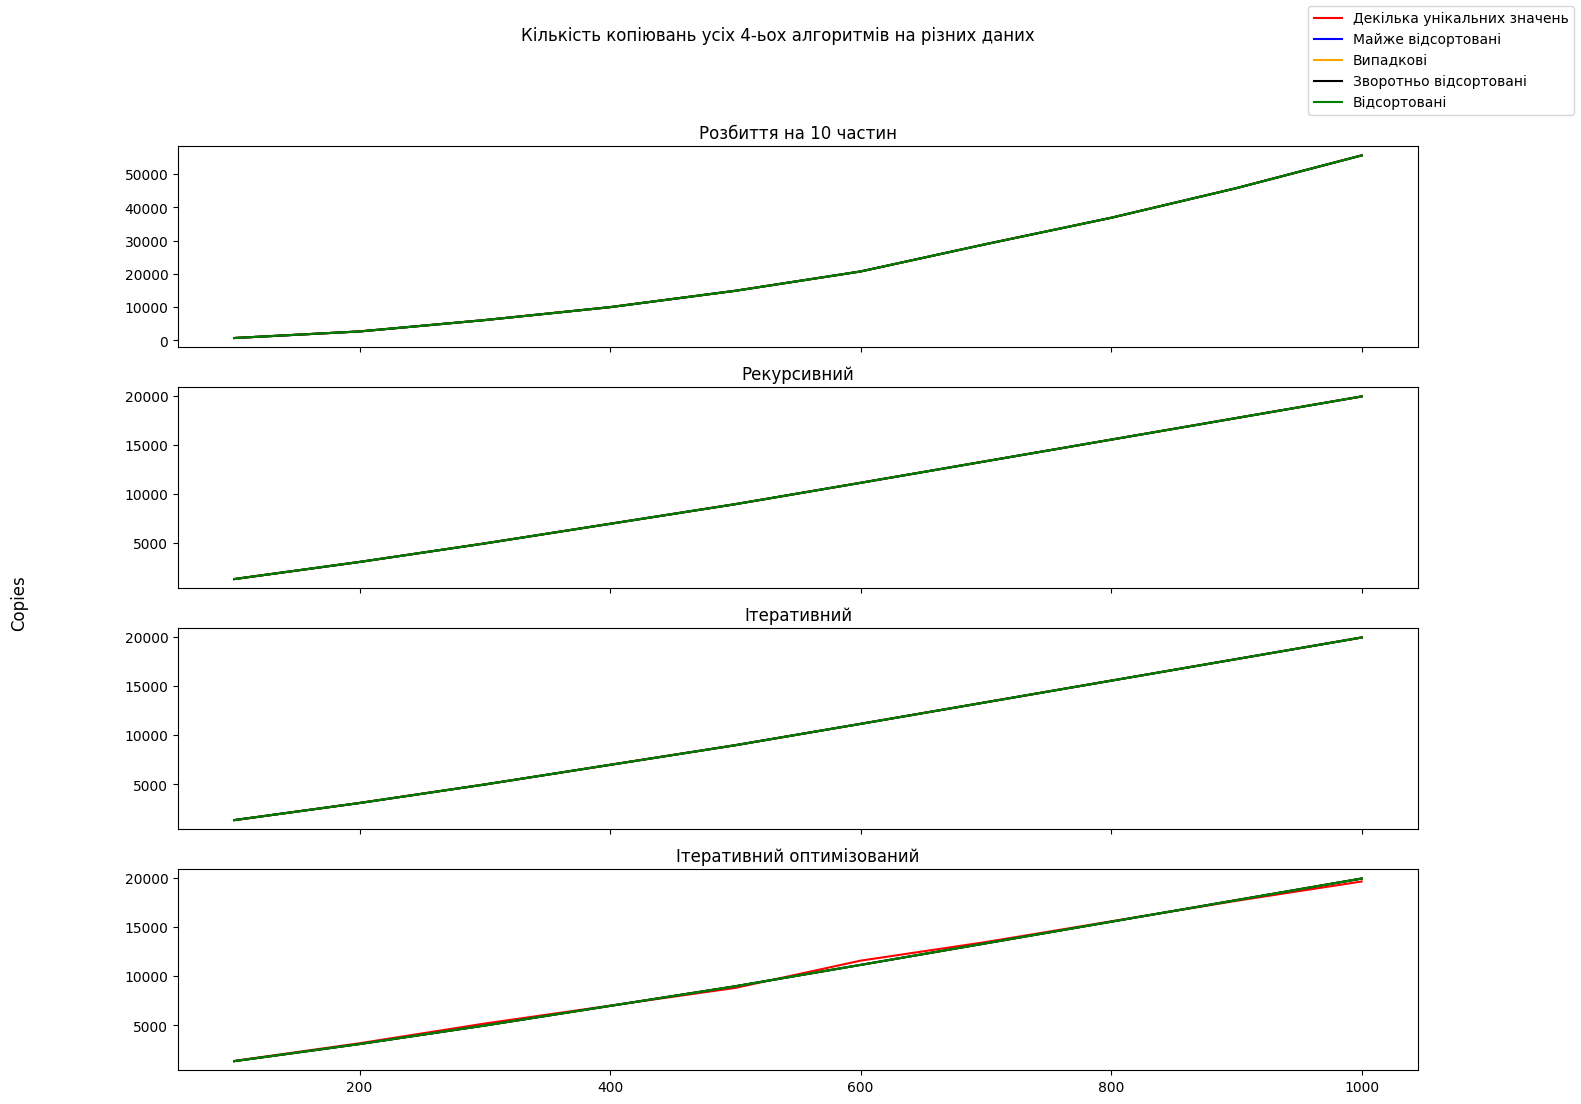

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
fig.supylabel('Copies')
fig.suptitle('Кількість копіювань усіх 4-ьох алгоритмів на різних даних')

axs[0].set_title("Розбиття на 10 частин")
axs[0].plot(X_size, Y_copies_iter10_few_unique_100, color = "red", label = "Декілька унікальних значень")
axs[0].plot(X_size, Y_copies_iter10_nearly_sorted_100, color = "blue", label = "Майже відсортовані")
axs[0].plot(X_size, Y_copies_iter10_random_100, color = "orange", label = "Випадкові")
axs[0].plot(X_size, Y_copies_iter10_reversed_sorted_100, color = "black", label = "Зворотньо відсортовані")
axs[0].plot(X_size, Y_copies_iter10_sorted_100, color = "green", label = "Відсортовані")

axs[1].set_title("Рекурсивний")
axs[1].plot(X_size, Y_copies_rec_few_unique_100, color = "red")
axs[1].plot(X_size, Y_copies_rec_nearly_sorted_100, color = "blue")
axs[1].plot(X_size, Y_copies_rec_random_100, color = "orange")
axs[1].plot(X_size, Y_copies_rec_reversed_sorted_100, color = "black")
axs[1].plot(X_size, Y_copies_rec_sorted_100, color = "green")

axs[2].set_title("Ітеративний")
axs[2].plot(X_size, Y_copies_iter_few_unique_100, color = "red")
axs[2].plot(X_size, Y_copies_iter_nearly_sorted_100, color = "blue")
axs[2].plot(X_size, Y_copies_iter_random_100, color = "orange")
axs[2].plot(X_size, Y_copies_iter_reversed_sorted_100, color = "black")
axs[2].plot(X_size, Y_copies_iter_sorted_100, color = "green")

axs[3].set_title("Ітеративний оптимізований")
axs[3].plot(X_size, Y_copies_opt_few_unique_100, color = "red")
axs[3].plot(X_size, Y_copies_opt_nearly_sorted_100, color = "blue")
axs[3].plot(X_size, Y_copies_opt_random_100, color = "orange")
axs[3].plot(X_size, Y_copies_opt_reversed_sorted_100, color = "black")
axs[3].plot(X_size, Y_copies_opt_sorted_100, color = "green")
fig.legend()

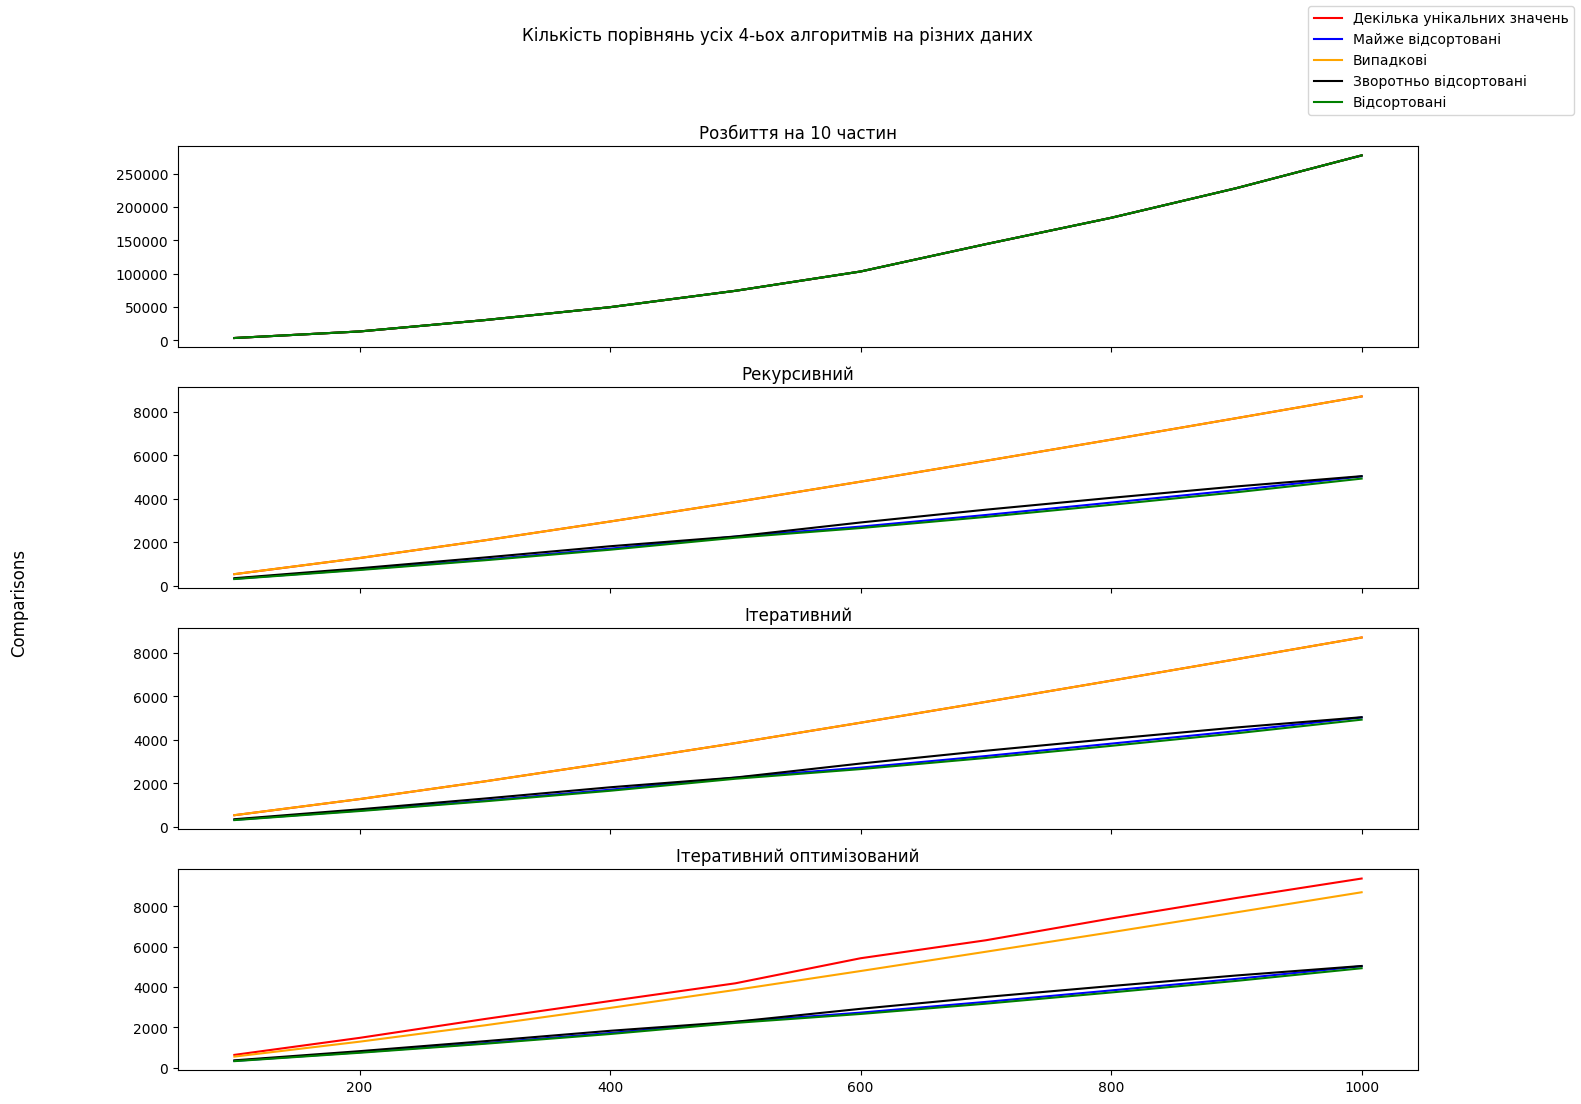

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
fig.supylabel('Comparisons')
fig.suptitle('Кількість порівнянь усіх 4-ьох алгоритмів на різних даних')

axs[0].set_title("Розбиття на 10 частин")
axs[0].plot(X_size, Y_comparisons_iter10_few_unique_100, color = "red", label = "Декілька унікальних значень")
axs[0].plot(X_size, Y_comparisons_iter10_nearly_sorted_100, color = "blue", label = "Майже відсортовані")
axs[0].plot(X_size, Y_comparisons_iter10_random_100, color = "orange", label = "Випадкові")
axs[0].plot(X_size, Y_comparisons_iter10_reversed_sorted_100, color = "black", label = "Зворотньо відсортовані")
axs[0].plot(X_size, Y_comparisons_iter10_sorted_100, color = "green", label = "Відсортовані")

axs[1].set_title("Рекурсивний")
axs[1].plot(X_size, Y_comparisons_rec_few_unique_100, color = "red")
axs[1].plot(X_size, Y_comparisons_rec_nearly_sorted_100, color = "blue")
axs[1].plot(X_size, Y_comparisons_rec_random_100, color = "orange")
axs[1].plot(X_size, Y_comparisons_rec_reversed_sorted_100, color = "black")
axs[1].plot(X_size, Y_comparisons_rec_sorted_100, color = "green")

axs[2].set_title("Ітеративний")
axs[2].plot(X_size, Y_comparisons_iter_few_unique_100, color = "red")
axs[2].plot(X_size, Y_comparisons_iter_nearly_sorted_100, color = "blue")
axs[2].plot(X_size, Y_comparisons_iter_random_100, color = "orange")
axs[2].plot(X_size, Y_comparisons_iter_reversed_sorted_100, color = "black")
axs[2].plot(X_size, Y_comparisons_iter_sorted_100, color = "green")

axs[3].set_title("Ітеративний оптимізований")
axs[3].plot(X_size, Y_comparisons_opt_few_unique_100, color = "red")
axs[3].plot(X_size, Y_comparisons_opt_nearly_sorted_100, color = "blue")
axs[3].plot(X_size, Y_comparisons_opt_random_100, color = "orange")
axs[3].plot(X_size, Y_comparisons_opt_reversed_sorted_100, color = "black")
axs[3].plot(X_size, Y_comparisons_opt_sorted_100, color = "green")
fig.legend()

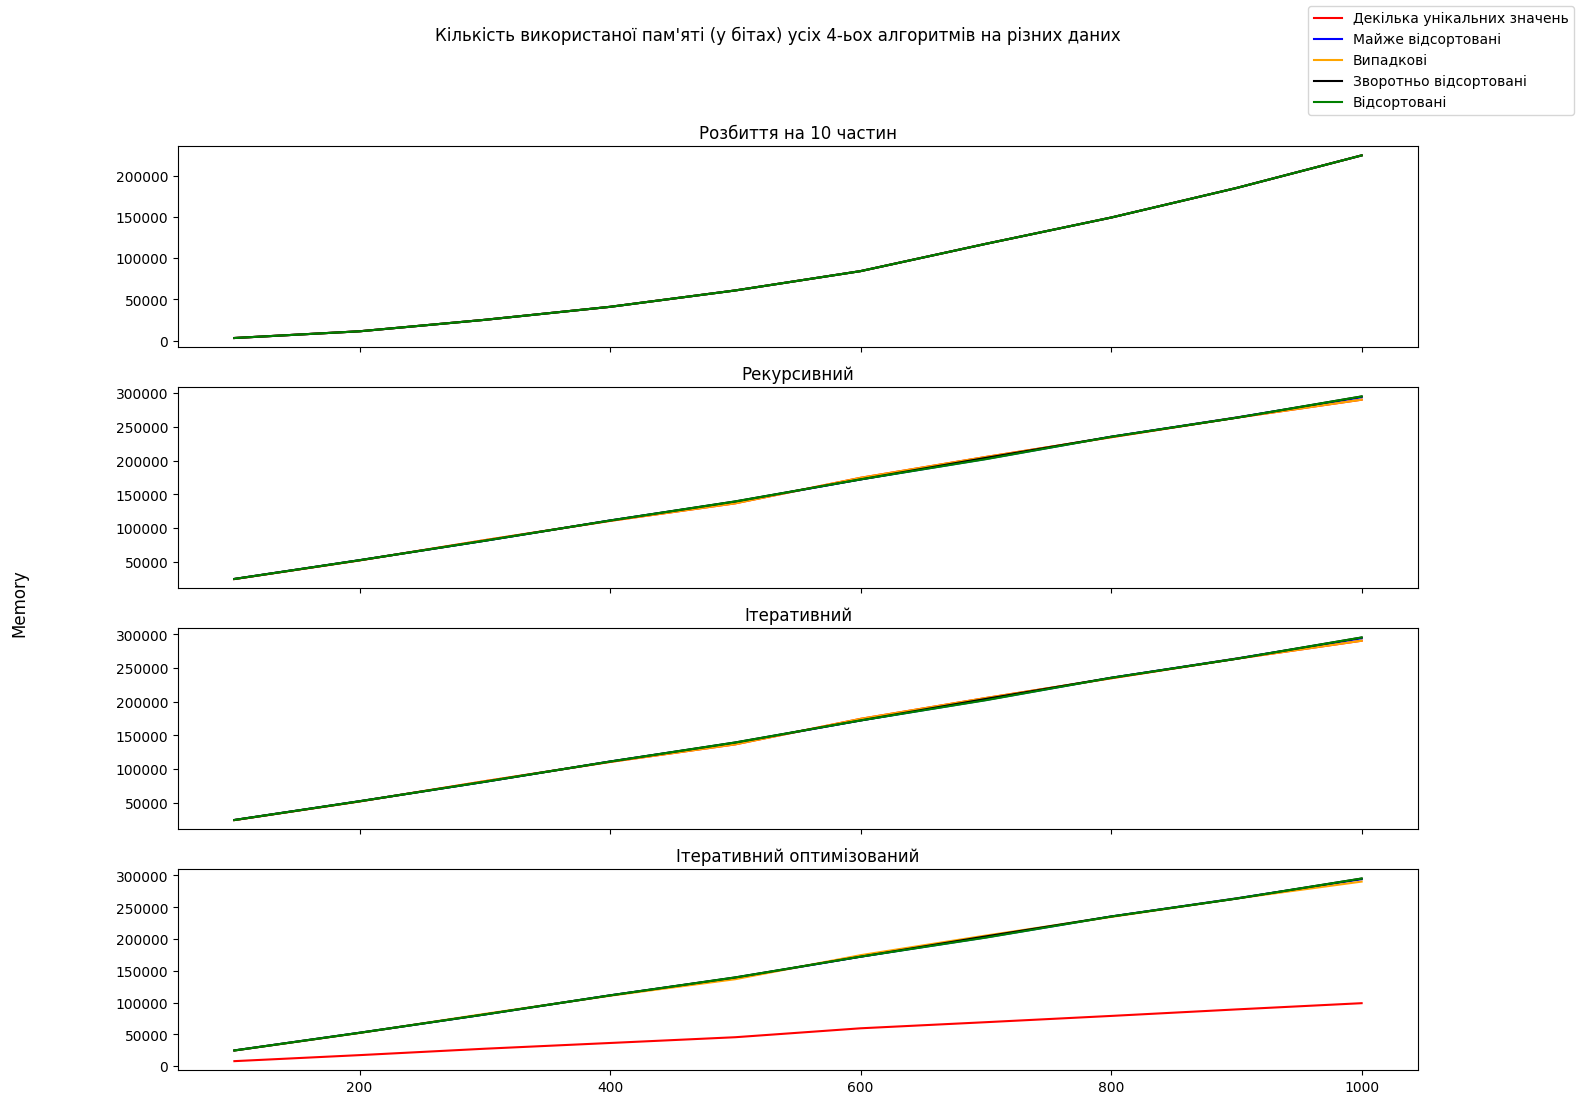

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
fig.supylabel('Memory')
fig.suptitle("Кількість використаної пам'яті (у бітах) усіх 4-ьох алгоритмів на різних даних")

axs[0].set_title("Розбиття на 10 частин")
axs[0].plot(X_size, Y_memory_iter10_few_unique_100, color = "red", label = "Декілька унікальних значень")
axs[0].plot(X_size, Y_memory_iter10_nearly_sorted_100, color = "blue", label = "Майже відсортовані")
axs[0].plot(X_size, Y_memory_iter10_random_100, color = "orange", label = "Випадкові")
axs[0].plot(X_size, Y_memory_iter10_reversed_sorted_100, color = "black", label = "Зворотньо відсортовані")
axs[0].plot(X_size, Y_memory_iter10_sorted_100, color = "green", label = "Відсортовані")

axs[1].set_title("Рекурсивний")
axs[1].plot(X_size, Y_memory_rec_few_unique_100, color = "red")
axs[1].plot(X_size, Y_memory_rec_nearly_sorted_100, color = "blue")
axs[1].plot(X_size, Y_memory_rec_random_100, color = "orange")
axs[1].plot(X_size, Y_memory_rec_reversed_sorted_100, color = "black")
axs[1].plot(X_size, Y_memory_rec_sorted_100, color = "green")

axs[2].set_title("Ітеративний")
axs[2].plot(X_size, Y_memory_iter_few_unique_100, color = "red")
axs[2].plot(X_size, Y_memory_iter_nearly_sorted_100, color = "blue")
axs[2].plot(X_size, Y_memory_iter_random_100, color = "orange")
axs[2].plot(X_size, Y_memory_iter_reversed_sorted_100, color = "black")
axs[2].plot(X_size, Y_memory_iter_sorted_100, color = "green")

axs[3].set_title("Ітеративний оптимізований")
axs[3].plot(X_size, Y_memory_opt_few_unique_100, color = "red")
axs[3].plot(X_size, Y_memory_opt_nearly_sorted_100, color = "blue")
axs[3].plot(X_size, Y_memory_opt_random_100, color = "orange")
axs[3].plot(X_size, Y_memory_opt_reversed_sorted_100, color = "black")
axs[3].plot(X_size, Y_memory_opt_sorted_100, color = "green")
fig.legend()